### <b>Setup </b>

Installing Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


The code above installs several Python packages using pip, which is the package installer for Python.
The ! at the beginning of the line is used to execute the command in a terminal or command prompt instead of in the Python interpreter. This is a Jupyter Notebook or Google Colab convention to execute shell commands from inside the notebook.

The packages being installed are:
- tensorflow: This is an open-source machine learning framework developed by Google that is used to build and train deep learning models.
- tensorflow-gpu: a version of tensorflow that supports GPU acceleration for faster training and inference.
- opencv-python: a library that provides computer vision and image processing functionality.
- matplotlib: a library for creating visualizations such as plots and charts.

Overall, this code installs the necessary packages required to run a deep learning model on a GPU, as well as packages for computer vision and visualization.

In [2]:
!pip list


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Package                      Version
---------------------------- -------------------
absl-py                      1.3.0
altair                       4.2.0
asgiref                      3.5.2
asttokens                    2.0.8
astunparse                   1.6.3
async-generator              1.10
attrs                        22.1.0
auth                         0.5.3
backcall                     0.2.0
beautifulsoup4               4.11.1
blinker                      1.5
branca                       0.6.0
cachetools                   5.2.0
caugetch                     0.0.1
certifi                      2022.6.15
cffi                         1.15.1
chardet                      5.0.0
charset-normalizer           2.1.0
click                        8.1.3
clipboard                    0.0.4
colorama                     0.4.5
commonmark                   0.9.1
cryptography                 37.0.4
cycler                       0.11.0
datareader                   0.0.9
debugpy                      1.6.

The above code is just to check if we've got the right dependencies installed

In [3]:
import tensorflow as tf
import os # Basically to navigate through file structure

# The above code imports the tensorflow library and the os library.
# The os library provides a way of using operating system dependent functionality like reading or writing to the file system, checking if a file exists, etc. It is used to manipulate paths, folders, and directories on the operating system.
# Overall, this code sets up the environment for building and training deep learning models using tensorflow and provides operating system dependent functionality using the os library

In [4]:
# Avoid Out Of Memory (OOM) errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

The above code is used to configure the memory growth of physical GPUs visible to TensorFlow. 

The list_physical_devices function of the tf.config.experimental module is used to get the list of all physical GPUs available to TensorFlow. The argument 'GPU' specifies that we want to get the list of all available GPUs.

The code then iterates over each GPU in the list obtained from the previous step and sets the memory growth option to True. This option dynamically allocates memory as needed by the TensorFlow process and releases it when it is no longer needed. 

Setting memory growth to True allows TensorFlow to allocate memory on the GPU only when it is needed, rather than allocating all the memory at once. This can be useful when working with large models that require a lot of memory.

Overall, this code sets the memory growth option for all physical GPUs visible to TensorFlow.

 <b>Removing Dodgy Images from our data</b>

In [5]:
import cv2
import imghdr

# The cv2 library is an open-source computer vision and machine learning software library. It provides a wide range of functions and tools for image and video processing, including image manipulation, object detection, and image segmentation.
# The imghdr module provides a way to determine the type of an image file based on its contents. It is used to check the file type of an image file.

In [6]:
data_dir = 'data'

# Here we create a variable to hold the path to our data directory

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

# Here we create a list of image extensions

The below code iterates over all the image files in the directory specified by data_dir. It uses the os library to access the files and the cv2 and imghdr libraries to check if each file is a valid image file.

The outer loop iterates over all the subdirectories in data_dir, assuming each subdirectory represents a different class of images. The inner loop iterates over all the image files in the subdirectory.

The code then constructs the full path to the image file using the os.path.join function. It reads the image file using cv2.imread and determines the image type using imghdr.what.

If the image type is not in the image_exts list, which likely contains a list of valid image file extensions such as .jpg, .png, and .gif, the code prints a warning message and removes the file using os.remove. 

The code also catches any exceptions that occur during the processing of an image file and prints a warning message. 

Overall, this code is likely used to clean and validate a dataset of image files in the directory specified by data_dir.

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

### <b>Importing the Data into our program</b>

In [9]:
import numpy as np
from matplotlib import pyplot as plt

The code below uses the image_dataset_from_directory function of the tf.keras.utils module in TensorFlow to create a tf.data.Dataset object from image files in the directory specified by data_dir.

The image_dataset_from_directory function generates a labeled tf.data.Dataset object from image files in a directory. It automatically infers the labels from the directory structure, where each subdirectory represents a different class.

The function returns a tuple containing two tf.data.Dataset objects: one for training data and one for validation data. The returned datasets are batched and preprocessed according to the arguments passed to the function.

In this code, the data variable is assigned the tf.data.Dataset object generated by image_dataset_from_directory. The function infers the labels and other parameters from the directory specified by data_dir.

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')
# This builds an image dataset and you don't need to build the label, classes and will also do some preprocessing and will also resize the images as well

Found 181 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

# This line of code creates an iterator object called data_iterator from a TensorFlow data object. The as_numpy_iterator() method is used to convert the data object into a Python iterator that yields NumPy arrays.

In [12]:
batch = data_iterator.next()

# This code is letting us access our data pipeline

The line of code above is used to get the next batch of data from the data_iterator object created earlier.

The next() method is called on the data_iterator object to get the next batch of data. This method returns the next element of the iterator, which in this case is a NumPy array representing a batch of data.

The batch of data is then stored in the batch variable, which can be used to perform operations on the batch of data.

It is important to note that the next() method raises a StopIteration exception when there are no more batches to yield. Therefore, it is common to use the for loop to iterate over the batches instead of using the next() method, unless you are certain that there are a fixed number of batches to process.

In [13]:
len(batch)
# There are 2 parts to this Dataset: The images & the labels

2

In [14]:
# Images represented as Numpy Arrays
batch[0].shape

(32, 256, 256, 3)

In [15]:
# Class 1 = SAD PEOPLE
# Class 2 = HAPPY PEOPLE
batch[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0])

The code below is using the Matplotlib library to create a plot of the first four images in the batch variable.

First, a subplots object is created with ncols=4 which creates a figure with four columns of subplots. The figsize parameter specifies the size of the figure in inches.

Next, a for loop is used to iterate over the first four images in the batch. The enumerate function is used to generate a sequence of tuples, where each tuple contains an index idx and an image img from the batch.

Inside the loop, each image is displayed on a subplot using the imshow method of the Axes object. The astype(int) method is used to convert the pixel values of the image from floating point to integer, which is required by the imshow method.

The title of each subplot is set to the label of the corresponding image in the batch using the title.set_text method of the Axes object. The label is obtained from batch[1][idx], which is the label of the idx-th image in the batch.

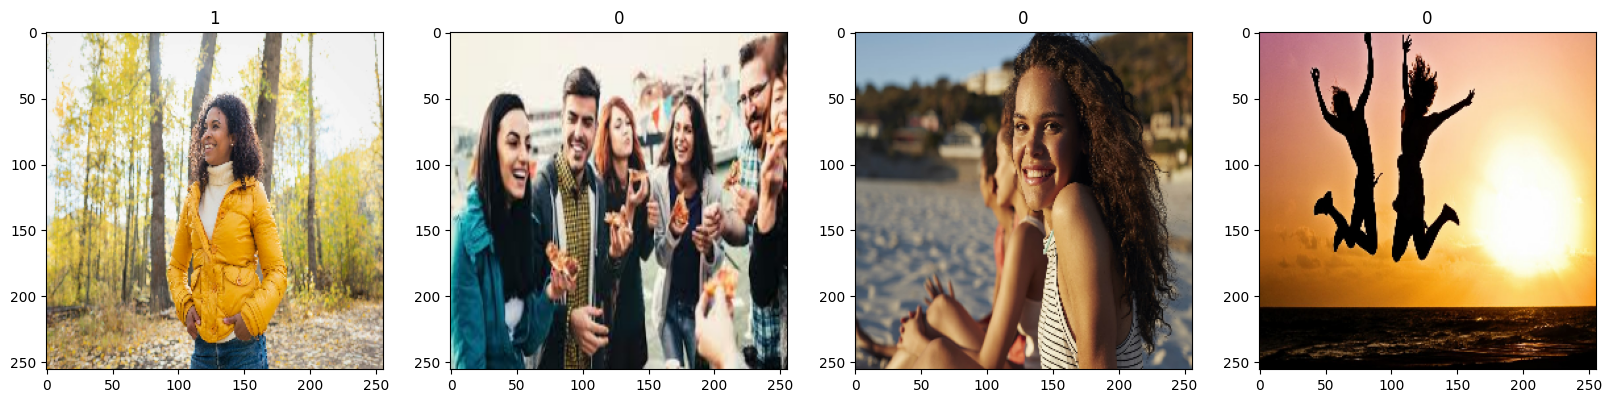

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# In the images below, 1 represents 'Sad people' while 0 represents 'Happy people'

<b>Preprocessing the Data</b>

Scaling our Data

This code is scaling the pixel values of the images in the 'batch' variable to the range of [0, 1] by dividing each pixel value by 255, which is the maximum pixel value for an 8-bit image.

The batch[0] expression selects the pixel values of the images in the batch. The resulting NumPy array has the shape (batch_size, height, width, channels), where 'batch_size' is the number of images in the batch, height and width are the dimensions of each image, and channels is the number of color channels.

The / 255 operation divides each pixel value in the batch array by 255, resulting in a new array called 'scaled' with the same shape as 'batch'. The resulting pixel values are now in the range of [0, 1].

Finally, the 'max()' method is called on the 'scaled' array to find the maximum pixel value in the scaled images. Since the images have been 'scaled' to the range of [0, 1], the maximum pixel value in the 'scaled' array should be 1.0.

In [17]:
scaled = batch[0] / 255
scaled.max()

1.0

In [18]:
data = data.map(lambda x,y: (x/255, y))

# The map function allows us to apply a particular type of transformation as the data is being preprocessed through the data pipeline
# This basically speeds up how quickly we can get our data from our disk
# The 'data.map' lets you perform that transformation in pipeline via the help of the lamda function
# When we access out batch (images and labels), 
# x will represent our images (because they are our independent features) 
# y will represent our target variable
# We get our data (x) and divide it by 255 but perform no transformation on our y

This above code is using the map() method to apply a lambda function to each element of a TensorFlow dataset called data.

The map() method is used to transform the elements of a dataset by applying a given function to each element. In this case, the lambda function takes two arguments, x and y, which represent an image and its corresponding label/variable, respectively.

The lambda function returns a tuple that contains the scaled image x/255 and the label y, where x/255 is the result of dividing each pixel value of the image x by 255 to scale the pixel values to the range of [0, 1].

The resulting dataset contains the same number of elements as the original dataset, but the images have been scaled to the range of [0, 1]. This is a common preprocessing step in deep learning models that use image data.

In [19]:
scaled_iterator = data.as_numpy_iterator()

# The as_numpy_iterator() method is a function of the tf.data.Dataset class in TensorFlow. This method returns an iterator that allows you to iterate through the elements of a dataset as NumPy arrays.
# By calling data.as_numpy_iterator(), we can obtain an iterator that allows us to iterate through the elements of a TensorFlow dataset as NumPy arrays. This can be useful in cases where we need to perform operations on the data that are easier or more efficient to do in NumPy than in TensorFlow.

In [20]:
batch = scaled_iterator.next()

# The code data.as_numpy_iterator() returns an iterator that iterates over the elements of the dataset and converts each element to a NumPy array.
# The code next() is called on the iterator, which returns the next element of the iterator as a NumPy array.
# So, data.as_numpy_iterator().next() returns the first element of the dataset as a NumPy array.

In [21]:
batch[0].max()

# batch: This is contains a batch of data. 
# [0]: This is accessing the first element of the batch. In Python, indexing starts at 0, so batch[0] would refer to the first item in the batch.
# .max(): This is a method that is being called on the first element of the batch. max() is a function that returns the maximum value of a given set of values. In this case, batch[0].max() will return the maximum value of the first element of the batch.
# So overall, this code is finding the maximum value in the first element of a batch of data. The type and shape of the data in the batch will determine the specific output of this code.

1.0

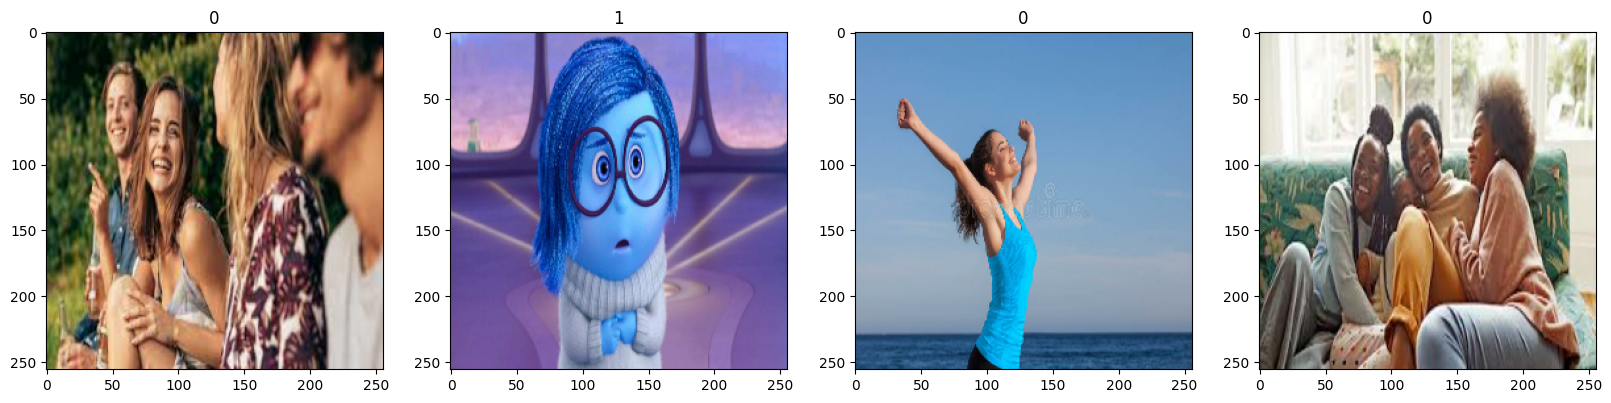

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) # This line creates a figure and a set of subplots, where ncols=4 specifies that there will be four subplots in a single row, and figsize=(20,20) sets the size of the figure to 20 by 20 inches. The fig variable contains the entire figure, and the ax variable contains an array of subplots.
for idx, img in enumerate(batch[0][:4]): # This is a for loop that iterates over the first four elements of the first item in the batch variable. The enumerate() function is used to provide both the index (idx) and the value (img) of each element in the loop.
    ax[idx].imshow(img) # This line sets the image data for the idx-th subplot to img, using the imshow() function in Matplotlib.
    ax[idx].title.set_text(batch[1][idx]) # This line sets the title of the idx-th subplot to the label of the corresponding image in batch[1]. This assumes that batch[1] contains the labels for the images in batch[0].


<b>Splitting the Data</b>

In [23]:
train_size = int(len(data)*.7) # Training size
val_size = int(len(data)*.2) # Validation size
test_size = int(len(data)*.1)+1 # Testing size


# This code is calculating the size of three subsets of a dataset: a training set, a validation set, and a test set.
# len(data) returns the total number of samples in the dataset.
# train_size = int(len(data)*.7) calculates the size of the training set as 70% of the total number of samples, using the int() function to round down to the nearest integer.
# val_size = int(len(data)*.2) calculates the size of the validation set as 20% of the total number of samples, again using int() to round down.
# test_size = int(len(data)*.1) calculates the size of the test set as 10% of the total number of samples.
# Overall, this code is a common way to split a dataset into three subsets for use in machine learning. The training set is used to train a model, the validation set is used to tune hyperparameters and evaluate model performance during training, and the test set is used to evaluate the final performance of the trained model. The specific sizes of these subsets may vary depending on the dataset and the problem being addressed.

In the above code, the train_size and val_size will be used during training while the test_size will be used post training to do the evaluation

In [24]:
train = data.take(train_size) # Take defines how much data will be taken in that particular partition
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In the above code, "train_size" is the desired size of the training set, i.e. the number of data points to include in the training set.


'val_size' is the desired size of the validation set, i.e. the number of data points to include in the validation set.

'test_size' is the desired size of the testing set, i.e. the number of data points to include in the testing set.

The code first takes train_size number of data points from the beginning of the data collection using the take method and assigns it to the train variable.

Then, it skips the first train_size data points and takes the next val_size number of data points using the skip and take methods and assigns it to the val variable.

Finally, it skips the first train_size + val_size data points and takes the next test_size number of data points using the skip and take methods and assigns it to the test variable.

After executing this code, train, val, and test will be non-overlapping subsets of data, with sizes equal to train_size, val_size, and test_size, respectively.

In [25]:
len(test)
# len(train)
# len(val)

1

### <b>Building Model</b>

The code below imports the necessary modules from the Keras API of TensorFlow to build a Convolutional Neural Network (CNN) model for image classification.

'Sequential' is a class of Keras API that allows us to build a sequential neural network layer by layer.

'Conv2D' is a class of Keras API that creates a convolutional layer that applies a set of learnable filters to the input image.

'MaxPooling2D' is a class of Keras API that creates a pooling layer to reduce the spatial dimensions of the input image by taking the maximum value in each non-overlapping rectangular region.

'Dense' is a class of Keras API that creates a fully connected layer where each neuron in the layer receives input from all neurons in the previous layer.

'Flatten' is a class of Keras API that flattens the output of the previous layer to a 1D array.

'Dropout' is a class of Keras API that applies a dropout regularization technique to randomly set a fraction of the input units to zero during training to prevent overfitting.


These modules are used to build the architecture of the CNN model for image classification. The model is initialized as a sequential model and the different layers are added to it one by one. The convolutional layers, max pooling layers, and fully connected layers are added using the Conv2D, MaxPooling2D, and Dense classes, respectively. The Flatten and Dropout layers are added to the model as needed for the particular architecture. 

Overall, this code sets up the framework for building a CNN model for image classification using Keras API in TensorFlow.

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

The code below initializes a neural network model using Keras Sequential API.

Sequential() is a function in Keras that creates an empty model object that allows you to add layers to it one by one. Each layer added to the model will process the output of the previous layer.

By calling Sequential(), a new model object is created that doesn't have any layers yet. The model will be used to define the architecture of a neural network by adding one or more layers to it

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) # This adds a convolutional layer to the model with 16 filters of size 3x3 and a stride of 1. The activation function used is ReLU. This is the first layer in the model and it expects input of size 256x256 with 3 color channels (RGB).
model.add(MaxPooling2D()) # This adds a max pooling layer to the model. The default size of the pooling window is 2x2, and the stride is also 2. This will reduce the spatial dimensions of the feature maps by a factor of 2.

model.add(Conv2D(32, (3,3), 1, activation='relu')) # This adds another convolutional layer to the model, this time with 32 filters of size 3x3 and a stride of 1. The activation function used is ReLU.
model.add(MaxPooling2D()) # This adds another max pooling layer to the model. Similar to the previous layer, this will reduce the spatial dimensions of the feature maps by a factor of 2.

model.add(Conv2D(16, (3,3), 1, activation='relu')) # This adds another convolutional layer to the model, with 16 filters of size 3x3 and a stride of 1. The activation function used is ReLU.
model.add(MaxPooling2D()) # This adds another max pooling layer to the model. Similar to the previous layers, this will reduce the spatial dimensions of the feature maps by a factor of 2.

model.add(Flatten()) # This adds a flattening layer to the model. This will reshape the output from the previous layer into a 1D vector, which can then be fed into a fully connected layer.

model.add(Dense(256, activation='relu')) # This adds a fully connected layer to the model, with 256 neurons and a ReLU activation function.
model.add(Dense(1, activation='sigmoid')) # This adds the output layer to the model, with a single neuron and a sigmoid activation function. This is a binary classification problem where the model is trained to output a probability of the input belonging to a single class. 


# Overall, this model consists of three convolutional layers followed by max pooling layers to downsample 
# the feature maps, then a fully connected layer to process the flattened feature maps, and an output 
# layer to produce the final prediction.

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# This code is configuring the model for training. Specifically, it's setting the optimizer (adam), loss function (tf.losses.BinaryCrossentropy), and evaluation metric we want to track is 'accuracy', this is to be used during the training process

In [30]:
model.summary()

# This shows us how our model transforms our data

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### <b>Training</b>

In [31]:
logdir = 'logs'

# This line of code assigns a string value 'logs' to the variable 'logdir'.
# This string value 'logs' is likely intended to represent a directory where logs or log files will be stored. In the context of a program, this variable 'logdir' could be used to refer to this directory location and perform file operations such as reading or writing log files to this directory.

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# This line of code creates a TensorBoard callback object and assigns it to the variable 'tensorboard_callback'.
# A callback in TensorFlow Keras is an object that can be passed to a model's fit() method to customize its behavior during training. In this case, the TensorBoard callback is used to visualize the training progress and performance metrics of the model in real-time during training.
# The callback is initialized with a 'log_dir' parameter that specifies the directory where the log files will be saved. The value of 'logdir' variable is passed as the argument for this parameter.
# Therefore, during training, the TensorBoard callback will create log files in the 'logs' directory, which can then be used by the TensorBoard visualization tool to generate graphs and metrics to help analyze the model's performance.

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

# This line of code trains the Keras model using the fit() method with the training data provided in the 'train' variable. The model will be trained for 20 epochs (passes through the training data), as specified by the 'epochs' parameter.
# Additionally, the validation data set 'val' is provided to the 'validation_data' parameter to monitor the model's performance on unseen data during training.
# Finally, a list of callbacks is passed to the 'callbacks' parameter, which includes the TensorBoard callback object 'tensorboard_callback' created earlier. This will enable TensorBoard to visualize the model's training progress and metrics in real-time during the training process.
# The output of this line of code is assigned to the 'hist' variable, which typically stores the training history of the model, including loss and accuracy values for each epoch, and can be used for further analysis or visualization of the training results.

Epoch 1/20
4/4 [==============================] - 11s 2s/step - loss: 1.0153 - accuracy: 0.5859 - val_loss: 0.5728 - val_accuracy: 0.6562
Epoch 2/20
4/4 [==============================] - 10s 2s/step - loss: 0.5193 - accuracy: 0.7344 - val_loss: 0.5477 - val_accuracy: 0.6875
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 0.4313 - accuracy: 0.7812 - val_loss: 0.5559 - val_accuracy: 0.6562
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.4644 - accuracy: 0.7188 - val_loss: 0.3298 - val_accuracy: 0.9688
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 0.3635 - accuracy: 0.8359 - val_loss: 0.2069 - val_accuracy: 0.9062
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 0.2733 - accuracy: 0.8672 - val_loss: 0.2938 - val_accuracy: 0.9375
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 0.2613 - accuracy: 0.9062 - val_loss: 0.5376 - val_accuracy: 0.7812
Epoch 8/20
4/4 [=======================

<b>From the above output, our Deep Neural Network is now trained</b>

In [34]:
hist.history

# This stores a whole lot of information such as the 'loss', the 'accuracy', 'validation loss' and the 'validation accuracy'

{'loss': [1.0153183937072754,
  0.5192957520484924,
  0.4312518239021301,
  0.4643853008747101,
  0.36354929208755493,
  0.27329057455062866,
  0.26130688190460205,
  0.25941702723503113,
  0.21218779683113098,
  0.15573051571846008,
  0.13034197688102722,
  0.07908692955970764,
  0.06000569835305214,
  0.034278787672519684,
  0.023928580805659294,
  0.011473898775875568,
  0.0054135071113705635,
  0.0045079500414431095,
  0.002636354649439454,
  0.001549780135974288],
 'accuracy': [0.5859375,
  0.734375,
  0.78125,
  0.71875,
  0.8359375,
  0.8671875,
  0.90625,
  0.875,
  0.9296875,
  0.9296875,
  0.96875,
  0.9765625,
  0.9921875,
  1.0,
  0.9921875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.5727766752243042,
  0.5476967096328735,
  0.5559477806091309,
  0.32983189821243286,
  0.2069109082221985,
  0.29380175471305847,
  0.5375618934631348,
  0.2793656587600708,
  0.1301860809326172,
  0.14315859973430634,
  0.07396182417869568,
  0.032454028725624084,
  0.0290852040052413

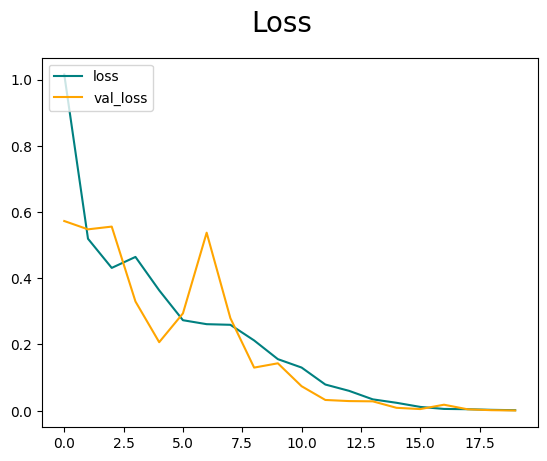

In [35]:
fig = plt.figure() # This creates a new figure object using matplotlib.pyplot.figure() function. The figure object is used to contain all the plots that we will create
plt.plot(hist.history['loss'], color='teal', label='loss') # This plots the training loss values
plt.plot(hist.history['val_loss'], color='orange', label='val_loss') # This plots the validation loss values
fig.suptitle('Loss', fontsize=20) # This line sets the title of the plot using fig.suptitle() method of the figure object. The title of the plot is 'Loss' and the fontsize is 20.
plt.legend(loc="upper left") # This line adds a legend to the plot using plt.legend() function. It creates a legend using the labels specified earlier in the plot lines (label='loss' and label='val_loss'). The loc parameter specifies the location of the legend on the plot, in this case, it is in the upper left corner of the plot.
plt.show() # This line shows the plot on the screen using plt.show() function


# This code generates a plot of the loss values of a Keras model during training and validation. The training history of the model is accessed through the 'hist' variable, which is assumed to have been previously defined and contains the loss values for each epoch.
# The code creates a new figure using the plt.figure() method and then plots the training loss values on the plot using the plt.plot() method with the 'loss' data from the history dictionary. The color of the line is set to teal using the 'color' parameter, and the label is set to 'loss' for the legend using the 'label' parameter.
# Similarly, the validation loss values are plotted on the same figure using plt.plot() with the 'val_loss' data from the history dictionary. The color of the line is set to orange and the label is set to 'val_loss' for the legend.
# The title of the plot is set using fig.suptitle() with a font size of 20. The plt.legend() method is used to display the legend in the upper left corner of the plot, and plt.show() is used to show the plot.
# Overall, this code is used to visualize the loss values of a Keras model during training and validation to help analyze the performance of the model and identify potential issues such as overfitting or underfitting.

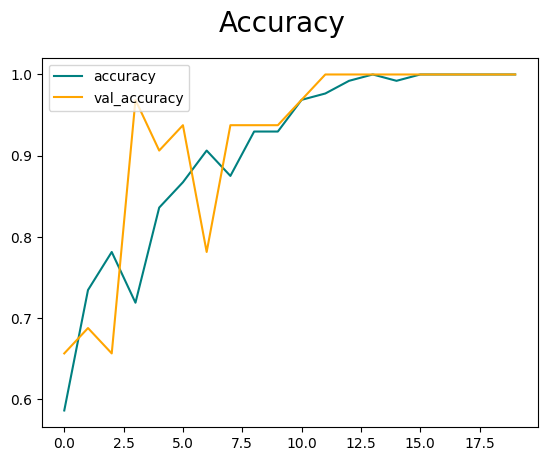

In [36]:
fig = plt.figure() # This creates a new figure object, which is a container for the graph that will be created.
plt.plot(hist.history['accuracy'], color='teal', label='accuracy') # This plots a line graph of the training accuracy over the epochs of the model. The hist.history['accuracy'] part accesses the accuracy values from the training history of the model, which has been stored in a dictionary-like object called hist. The color='teal' argument sets the color of the line to teal, and label='accuracy' sets the label for this line to 'accuracy'.
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy') # This plots a line graph of the validation accuracy over the epochs of the model. The hist.history['val_accuracy'] part accesses the validation accuracy values from the training history of the model. The color='orange' argument sets the color of the line to orange, and label='val_accuracy' sets the label for this line to 'val_accuracy'.
fig.suptitle('Accuracy', fontsize=20) # This sets the title of the figure to 'Accuracy' and increases the font size to 20.
plt.legend(loc="upper left") # This adds a legend to the graph in the upper-left corner. The legend shows the labels for each line, which were set in lines 2 and 3.
plt.show() # This displays the graph on the screen

<b>Our model is now trained, we've completed our modelling step. The deep learming model has been built and we've used our sequential API, the model has also been trained using the model.fit function and we've also viewed our training performance by visualizing our loss and accuracy</b>

### <b>Testing</b>

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


# This code imports three classes from the tensorflow.keras.metrics module: Precision, Recall, and BinaryAccuracy.
# These classes represent common evaluation metrics used in binary classification tasks.
# Precision: the proportion of true positives among all positive predictions. It measures how well the model avoids false positives.
# Recall: the proportion of true positives among all actual positive instances. It measures how well the model avoids false negatives.
# BinaryAccuracy: the proportion of correct predictions (both true positives and true negatives) among all predictions. It measures how well the model overall is able to classify the inputs correctly into binary categories.
# Once these classes are imported, they can be used to evaluate the performance of a binary classification model during training and testing phases.

In [38]:
pre = Precision() # This creates an instance of the Precision metric, which is a measure of how many of the predicted positive instances are actually positive. In other words, it is the ratio of true positive predictions to the total number of positive predictions.
re = Recall() # This creates an instance of the Recall metric, which is a measure of how many of the actual positive instances are correctly identified as positive. In other words, it is the ratio of true positive predictions to the total number of actual positive instances.
acc = BinaryAccuracy() # This creates an instance of the BinaryAccuracy metric, which is a measure of how many predictions match the true values. In other words, it is the ratio of correct predictions to the total number of predictions.

In [39]:
for batch in test.as_numpy_iterator(): # This begins a loop over the test dataset, where each iteration of the loop processes one batch of data.
    X, y = batch # This line unpacks the current batch of data into two variables: X represents the input features, and y represents the corresponding labels.
    yhat = model.predict(X) # This line uses the trained model to generate predictions for the input features X, producing a set of predicted labels yhat.
    pre.update_state(y, yhat) # This line updates the pre object, which represents the Precision metric, with the true labels y and predicted labels yhat for the current batch. This updates the internal state of the metric to incorporate the new batch of predictions.
    re.update_state(y, yhat) # This line updates the re object, which represents the Recall metric, with the true labels y and predicted labels yhat for the current batch. This updates the internal state of the metric to incorporate the new batch of predictions.
    acc.update_state(y, yhat) # This line updates the acc object, which represents the BinaryAccuracy metric, with the true labels y and predicted labels yhat for the current batch. This updates the internal state of the metric to incorporate the new batch of predictions.


# Overall, this code allows the model's performance to be evaluated on the test dataset using the precision, recall, 
# and accuracy metrics. Each batch of data is processed sequentially, and the metrics are updated with the corresponding true and 
# predicted labels for each batch. This process continues until all batches in the test dataset have been processed, 
# at which point the final values of the metrics can be obtained by calling their result() method.


The line of code below prints out the current values of the Precision, Recall, and BinaryAccuracy metrics as a formatted string, with the values rounded to a specific number of decimal places. Here's a breakdown of what this line does:

- f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}': This creates a formatted string that includes the current values of the Precision, Recall, and BinaryAccuracy metrics. The values are obtained by calling the result() method of each metric object and converting the resulting tensor to a NumPy array using the numpy() method.

- print(...): This prints the formatted string to the console.

By using a formatted string, you can customize the output to include additional information or formatting, such as rounding the metric values to a specific number of decimal places. This can make it easier to interpret and compare the performance of different models or configurations.

In [40]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


The line of code below prints out the current values of the Precision, Recall, and BinaryAccuracy metrics after they have been updated with all of the batches in the test dataset. Here's a breakdown of what this line does:

- pre.result(): This calls the result() method of the pre object, which returns the current value of the Precision metric. This value represents the ratio of true positive predictions to the total number of positive predictions across the entire test dataset.

- re.result(): This calls the result() method of the re object, which returns the current value of the Recall metric. This value represents the ratio of true positive predictions to the total number of actual positive instances across the entire test dataset.

- acc.result(): This calls the result() method of the acc object, which returns the current value of the BinaryAccuracy metric. This value represents the ratio of correct predictions to the total number of predictions across the entire test dataset.

By printing out these values, you can get a sense of how well the model is performing on the test dataset according to these three metrics. Depending on the application, different metrics may be more or less important, so it's important to carefully choose and evaluate performance metrics to ensure that a model is meeting the desired criteria for success.

In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [42]:
import cv2

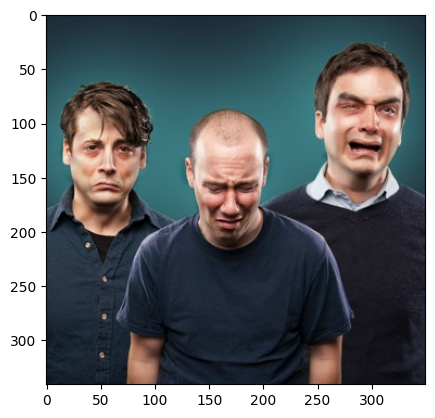

In [76]:
img = cv2.imread('sadpeople.jpg') # This reads the image into 'img'
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # This converts the image from BGR to RGB
plt.show() # This displays the plot generated by imshow()

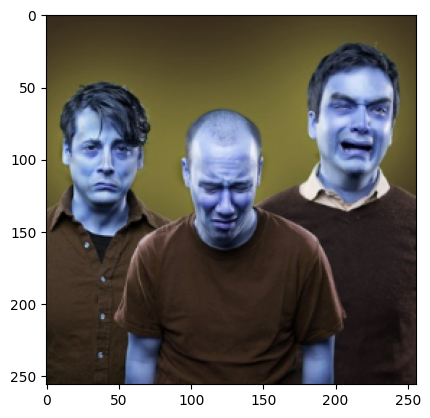

In [77]:
resize = tf.image.resize(img, (256,256)) # This line resizes the input image 'img' using TensorFlow's tf.image.resize() function, which resizes the image to the specified dimensions of (256,256). The resized image is stored in the resize variable.
plt.imshow(resize.numpy().astype(int)) # This line uses matplotlib's imshow() function to display the resized image. The numpy() method is called on the resize tensor to convert it to a NumPy array, and the astype() method is called to cast the array to the integer data type. The resulting array is passed as the argument to imshow(), which displays the image.
plt.show() # This displays the resized image

The code below predicts the output of a machine learning model for a single input image that has been resized and normalized. Here's a breakdown of what each part of the code does:

- resize/255: This code normalizes the pixel values of the resize image by dividing each pixel value by 255. This scales the pixel values to be between 0 and 1, which can make it easier for the machine learning model to learn patterns in the data.

- np.expand_dims(resize/255, 0): This code adds an extra dimension to the normalized image array at position 0, effectively creating a batch size of 1. This is necessary because most machine learning models are designed to process data in batches, so even when making a prediction for a single image, it must be formatted as a batch with a single element.

- model.predict(...): This code calls the predict() method of the model object, which is assumed to be a machine learning model that has been previously trained on a dataset. The normalized and resized image with a batch size of 1 is passed as an argument to the predict() method, which generates a prediction for the input image.

- yhat: This code assigns the output of the predict() method to the yhat variable, which is assumed to contain the predicted output of the model for the input image.

In [78]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

array([[0.99992555]], dtype=float32)

In [79]:
if yhat > 0.5: # This code checks if the value of yhat, which contains the output of our prediction for a single input image, is greater than 0.5/50%.
    print(f'This Person is Sad') # If the value of yhat is greater than 0.5/50%, this code prints a string indicating that the predicted class is "Sad".
else: # If the value of yhat is less than or equal to 0.5/50%, this code executes the block of code below.
    print(f'This Person is Happy') # If the value of yhat is less than or equal to 0.5/50%, this code prints a string indicating that the predicted class is "Happy".

This Person is Sad


### Save the Model

In [80]:
from tensorflow.keras.models import load_model

# The code above is used to import the load_model function from the tensorflow.keras.models module in the TensorFlow Python library.
# The load_model function allows us to load a pre-trained machine learning model saved in a file format such as HDF5. Once the model is loaded, we can use it to make predictions on new data, fine-tune it, or extract certain layers for feature extraction.
# So it basically allows us to easily re-use pre-trained Machine Learning models in projects without having to retrain them from scratch

In [81]:
model.save(os.path.join('models','imageclassifier.h5'))

# We're taking our model and Serializing it unto something we can store as a  disk similar to when a datset is zipped, h5 is a serialization format
# The above code is used to save our keras model to a file titled 'imageclassfier.h5' in a folder called 'models'.
# In this code, model is the Keras model we want to save, and os.path.join('models','imageclassifier.h5') is the path where we want to save the model.
# os.path.join() is a method in the os module that joins two or more paths together to create a single path. In this case, it joins the string 'models' and 'imageclassifier.h5' to create the path 'models/imageclassifier.h5'.
# The '.h5' file extension is used for HDF5 file format which is a popular file format for storing scientific data. Keras models are usually saved in this format.

In [82]:
(os.path.join('models','imageclassifier.h5'))

# This code shows us the file path of our model folder

'models\\imageclassifier.h5'

In [83]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In the above code, new_model = load_model(os.path.join('models', 'imageclassifier.h5')) is used to load our Keras model from our file called 'imageclassifier.h5' in our folder called "models".

In this code, os.path.join('models', 'imageclassifier.h5') is the path to the model file that you want to load, and load_model() is a function from the keras.models module that loads the Keras model from the specified file path.

The loaded model is then assigned to a variable called new_model, which can be used to make predictions on new data or to continue training the model if desired.

In [84]:
new_model
# Our model is not stored in 'new_model'

<b>Testing the saved Model</b>

In [86]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))
yhatnew

array([[0.99992555]], dtype=float32)

In [87]:
if yhatnew > 0.5: # This code checks if the value of yhat, which contains the output of our prediction for a single input image, is greater than 0.5/50%.
    print(f'This Person is Sad') # If the value of yhat is greater than 0.5/50%, this code prints a string indicating that the predicted class is "Sad".
else: # If the value of yhat is less than or equal to 0.5/50%, this code executes the block of code below.
    print(f'This Person is Happy') # If the value of yhat is less than or equal to 0.5/50%, this code prints a string indicating that the predicted class is "Happy".

This Person is Sad
